Keras - GRU Model을 통한 IMDB 리뷰 (Movie - Mickey 17) 감성 분류

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print('첫번째 훈련용 리뷰 : ', X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :', y_train[0])

첫번째 훈련용 리뷰 :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


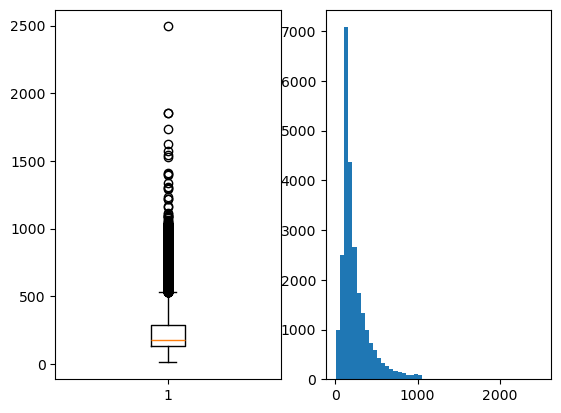

In [5]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1, 2, 1)
plt.boxplot(reviews_length)
plt.subplot(1, 2, 2)
plt.hist(reviews_length, bins = 50)
plt.show()

In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print("각 레이블에 대한 빈도수 :")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수 :
[[    0     1]
 [12500 12500]]


In [7]:
# IMDB 리뷰 데이터셋에서는 0, 1, 2, 3을 특별 토큰으로 취급 -> 인덱스에 3을 더해야 함

word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items() :
    index_to_word[value + 3] = key

print('빈도수 상위 1등 단어 : {}'.format(index_to_word[1 + 3]))
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3938 + 3]))

빈도수 상위 1등 단어 : the
빈도수 상위 3938등 단어 : suited


In [8]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")) :
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

GRU로 IMDB 리뷰 감성 분류하기

In [9]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [11]:
embedding_dim = 100     # 임베딩 차원 수
hidden_units = 120      # 은닉층 사이즈

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('GRU_model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 15, callbacks = [es, mc], batch_size = 64, validation_split = 0.2)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6052 - loss: 0.6390
Epoch 1: val_accuracy improved from -inf to 0.78880, saving model to GRU_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 103s 328ms/step - accuracy: 0.6055 - loss: 0.6387 - val_accuracy: 0.7888 - val_loss: 0.4443
Epoch 2/15
 84/313 ━━━━━━━━━━━━━━━━━━━━ 1:09 303ms/step - accuracy: 0.8062 - loss: 0.4359

KeyboardInterrupt: 

In [48]:
loaded_model = load_model('GRU_model.h5', compile = False) # compile 중복 이슈 해결
loaded_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8882 - loss: 0.3168

 테스트 정확도 : 0.8898


In [50]:
def sentiment_predict(new_sentence) :
    new_sentence = re.sub(r"[^0-9a-zA-Z\s'\"-]", '', new_sentence).lower() # 특수문자 처리 
    encoded = []

    # 띄어쓰기 단위 토큰화 후 정수 인코딩
    for word in new_sentence.split() :
        try :
            if word_to_index[word] <= 10000 :
                encoded.append(word_to_index[word] + 3)
            else :
                encoded.append(2)
        except KeyError :
            encoded.append(2)

    pad_sequence = pad_sequences([encoded], maxlen = max_len)
    score = float(loaded_model.predict(pad_sequence)[0][0]) # 배열 반환 후 실수로 변환

    if(score > 0.5) :
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else :
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

<입력>
(삼중 따옴표 사용해서 python 문법 충돌 방지) 
test_input = """ """  
sentiment_predict(test_input)

In [51]:
# 별점 1/10

test_input = """ How is this even possible that the same person who made Parasite created this absolute mess of a film?

This film has no redeeming qualities and is just a boring, uninspiring chain of incredulous events that lead to nothing.

The acting is so over the top but also dull and tacky that is even hard to explain.

The basic idea of a film albeit showing some promise is utterly squandered and goes absolutely nowhere.

I cannot come up with a single good thing about it, usually at least it would be that it ended but it just made me angry because it was long and yet nothing of substance actually happened!
Do not waste your time on this!
You are welcome.

P. S. I wish I could give it 0/10.. """
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
99.79% 확률로 부정 리뷰입니다.


In [52]:
# 별점 9/10

test_input = """ I love movies that step out of the comfort zone and aren't afraid to tell a weird, uncomfortable story. This movie is exactly that. Although it's not perfect, it's dark, comedic, thought-provoking & corny (in good and some bad ways lol). Robert Pattinson's character is a little annoying with the whole voice thing at first but his acting is incredible in this movie, props to him. Joon-ho had a super high bar to reach after Parasite, and this movie definitely reached that for me. His work is diverse, unique and poetic while being entertaining for all. Overall it is definitely worth a watch and one of my faves in recent years. """ 
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
99.87% 확률로 긍정 리뷰입니다.


In [53]:
# 별점 7/10

test_input = """ Nothing incredibly groundbreaking, and a little heavy handed with the satire, but a fun ride and well shot, with all of the "I shouldn't laugh at this but I am" that you'd expect

I am guilty, as many others will be, of comparing this to Parasite. Doing so is doing the movie a disservice. From Bong Joon Ho I was not expecting a silly black comedy that would have the whole theater laughing. Accept and enjoy it and you'll have a great time.

Although I felt like I was getting slapped in the face with the Trump satire, it still hit pretty well and got a good few laughs out of me.

After all this, I'm still wondering what the sauce is about... """
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
93.02% 확률로 긍정 리뷰입니다.


In [54]:
# 별점 1/10

test_input = """As a big fan of both Robert Pattinson and space movies, I was really looking forward to this one. However, it was truly one of the worst movies I have seen in some time and we see almost everything that comes out. The acting was lame, the sets were lame, and the CGI below par. Pattinson's weird voice was very distracting and they reduced him to a mushy-brained fool. It took all my patience to not walk out, but we suffered through to the end. Don't waste your time and money. This would only be entertaining if you were home with the flu, it was streaming free, and nothing else was on. Don't bother. """ 
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
99.99% 확률로 부정 리뷰입니다.


In [55]:
# 별점 5/10

test_input = """ Mickey 17 is like strictly okayish and that's a huge disappointment given the expectations!

Bong joon-ho returning in director's chair after an Oscar, with Robert pattinson, a sci-fi genre and huge budget, it could have been so much better! But this is just okay.

Pattinson's acting is great, even the premise and structure were very juicy. But for some reason Bong joon-ho doesn't fully capitalise it. Atleast the crazy energy of Okja would have elevated the screenplay, but it was mostly bland and trying to be politically aware.

Especially with that trailer being so much fun, the bar was really high, but this doesn't even comes close."""  
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
99.84% 확률로 부정 리뷰입니다.


In [56]:
# 별점 5/10

test_input = """ First things first: I'd like to start my review by stating that "Parasite" is not just one of the best films in recent memory, but it's truly one of my favorite films of all time. Bong Joon-Ho's genre-bending 2019 masterpiece utterly blew me away when I saw it for the first time. I was enthralled and riveted by its brilliant craftsmanship, timely and clever social satire, memorable characters, and--most importantly--its impeccable commitment to original and creative storytelling. So needless to say, I was incredibly excited to see Bong's next film. The trailers looked a bit bizarre and eccentric, but I always trusted Bong to make a great movie. Unfortunately, I was pretty disappointed in "Mickey 17." I found it a largely pointless exercise lacking in insight or creativity compared to "Parasite." And given how much I loved "Parasite" and was hoping to love this film, it really pains me to say that.

The film centers around Mickey, an astronaut who is an "expendable," meaning that he is sent on deadly missions and a newly regenerated (cloned) body is printed out again when he "dies." Unfortunately, the story isn't as clever or hard-hitting as it thinks it is. The narrative often feels fairly pointless, filled to the brim with so many scenes of Mickey getting killed off in different ways with little other purpose, which gets tiring after a while. I frequently questioned what the point of a lot of it was, which is unfortunate. The film's messages about cloning and contemporary politics come off as fairly on-the-nose rather than interesting or profound. But above all, the film just isn't as interesting (tonally, aesthetically, or in terms of character development) as you would hope a Bong Joon-Ho film would be. Robert Pattinson does pretty well with the material he is given (including playing multiple Mickeys with multiple accents,) and I liked Naomi Ackie's supporting performance. But I was less than enthusiastic about Mark Ruffalo's supporting role as a Trump-esque, buffoonish villain and Toni Collette as his wife. They weren't very engaging characters, despite Bong's attempt at creating political satire. The cinematography, editing, and score are good, but nothing mind-blowing or memorable like the filmmaking techniques that were on display in "Parasite."

So, "Mickey 17" unfortunately just didn't click with me. That's too bad, but in no way does that ever change or minimize the fact that "Parasite" is an extraordinary modern classic that deserved every single one of the many accolades it received. 5/10.

Note: I saw the film in Dolby Cinema. The picture and sound quality were good, but it was not one of the best Dolby presentations I have seen. """  
sentiment_predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
67.20% 확률로 부정 리뷰입니다.
